Mean Absolute Error: 13721.325555555557
Mean Squared Error: 607132589.9693
R-squared: -11.320792047255516


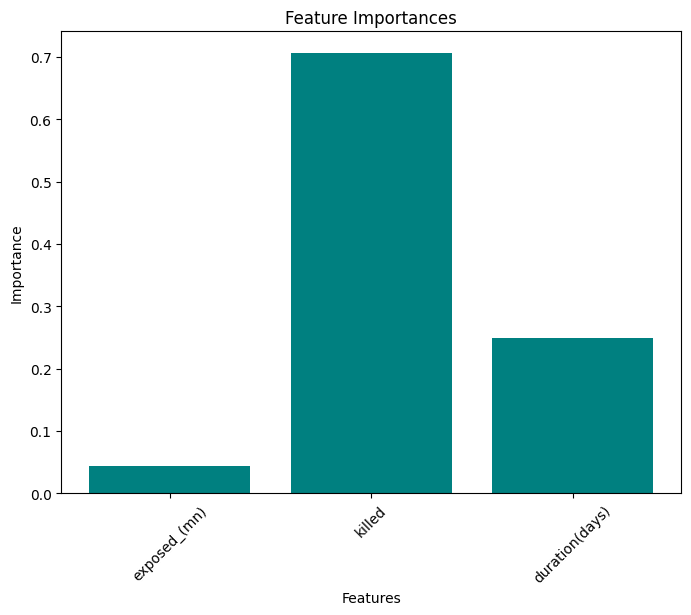

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the data
data_path = '../data/processed/cleaned_flood_data.csv'
df = pd.read_csv(data_path)

# Define features and target variable
X = df[['exposed_(mn)', 'killed', 'duration(days)']]
y = df['displaced_(k)']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Save model for later use if needed
joblib.dump(model, '../models/model.pkl')

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature importance plot
importances = model.feature_importances_
features = X.columns
indices = range(len(features))

plt.figure(figsize=(8, 6))
plt.bar(indices, importances, color='teal', align='center')
plt.xticks(indices, features, rotation=45)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()